<a href="https://colab.research.google.com/github/domdoom249/MLOPs/blob/main/2019686_Quiz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advertising Dataset Analysis

This notebook performs comprehensive data cleaning, feature engineering, and comparative regression analysis on an advertising dataset. We'll follow a structured approach to analyze how different advertising channels affect sales and compare linear and logistic regression models.

## Overview of Tasks
1. Data Loading and Exploration
2. Data Cleaning and Preprocessing
3. Feature Engineering
4. Model Training and Evaluation
5. Results Visualization and Comparison

## Step 0: Import Libraries and Load Data

First, we'll import all necessary libraries for our analysis.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# For better visualization in the notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

Now, let's load the advertising dataset into a pandas DataFrame.

Original Dataset Loaded:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         10 non-null     float64
 1   Radio      10 non-null     float64
 2   Newspaper  10 non-null     float64
 3   Sales      10 non-null     float64
dtypes: float64(4)
memory usage: 452.0 bytes

Dataset Summary Statistics:


,TV,Radio,Newspaper,Sales
count,10.00000,10.000000,10.000000,10.000000
mean,101.89000,28.110000,43.280000,13.150000
std,84.89945,17.836071,26.850649,5.117779
min,8.60000,2.100000,1.000000,4.800000
25%,24.02500,13.000000,21.775000,10.750000
50%,88.85000,35.300000,51.750000,12.600000
75%,173.47500,40.800000,66.525000,16.275000
max,230.10000,48.900000,75.000000,22.100000


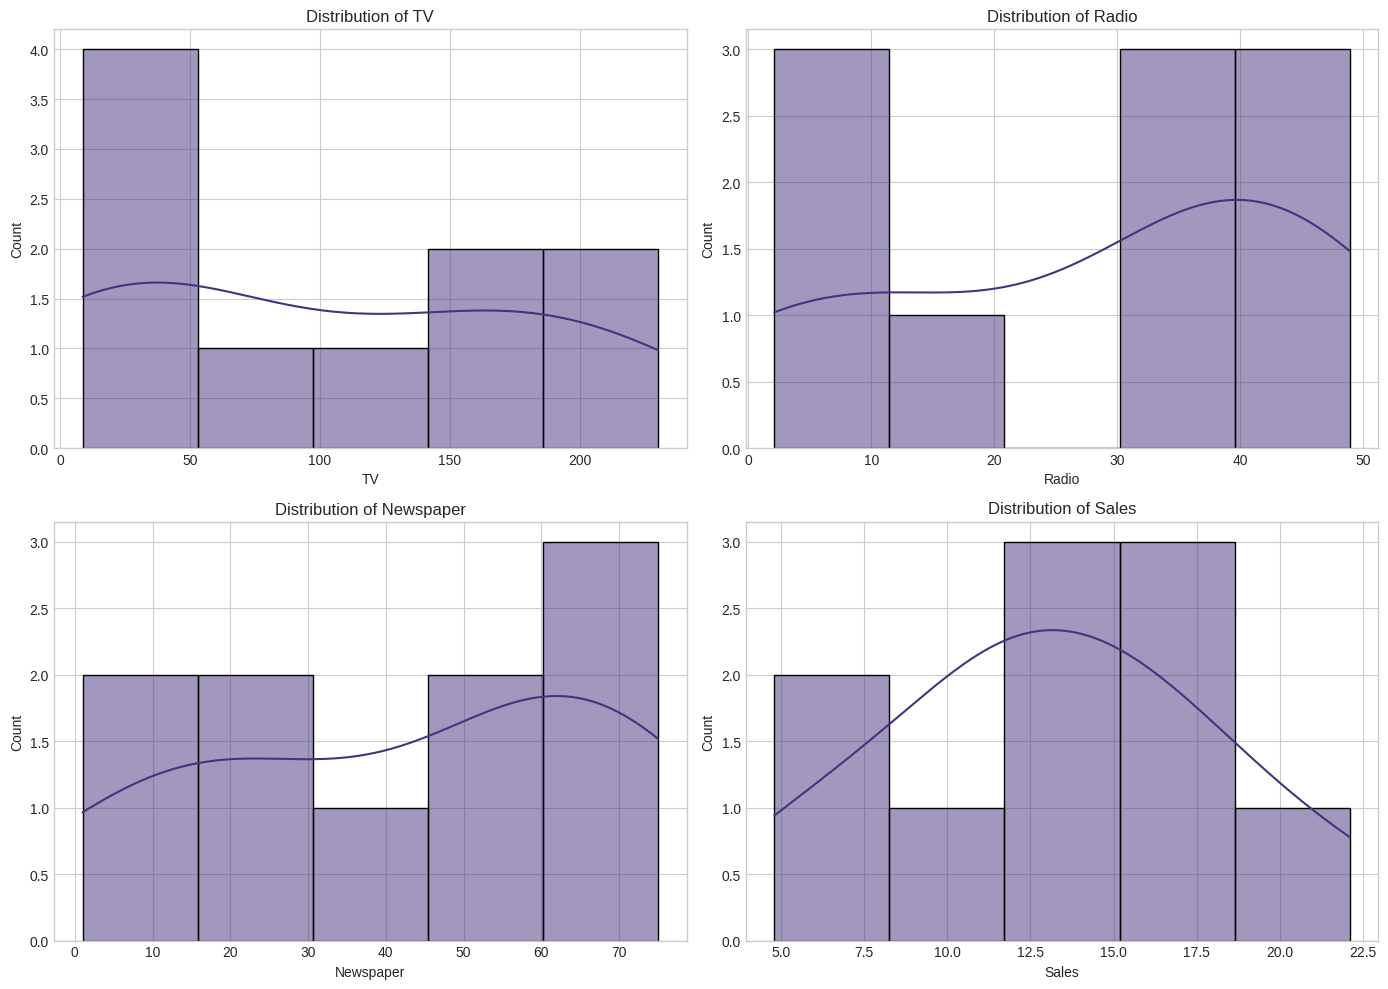

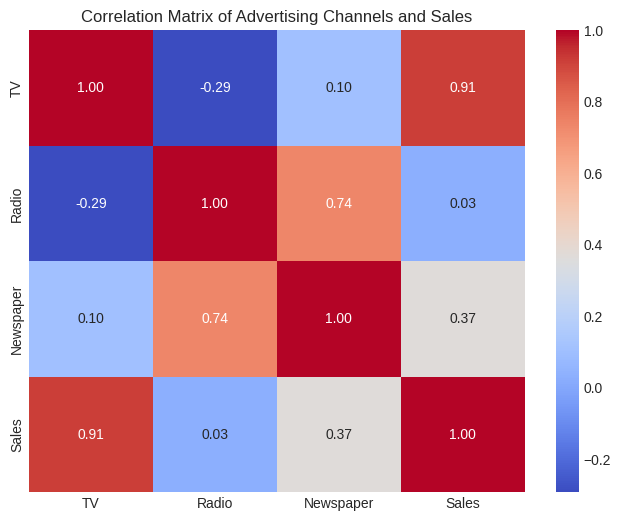

In [2]:
# Load the advertising dataset
data = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6],
    'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2],
    'Sales': [22.1, 10.4, 12.0, 16.5, 17.9, 7.2, 11.8, 13.2, 4.8, 15.6]
}

df = pd.DataFrame(data)
print("Original Dataset Loaded:")
display(df.head())

print("\nDataset Info:")
df.info()

# Additional exploratory analysis
print("\nDataset Summary Statistics:")
display(df.describe())

# Visualize the distribution of each feature
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Advertising Channels and Sales')
plt.show()

## Step 1: Rename Columns (Task #1)

Rename the column 'TV' to 'Television' and the column 'Radio' to 'Audio_Ads'.

In [3]:
df = df.rename(columns={
    'TV': 'Television',
    'Radio': 'Audio_Ads'
})

print("DataFrame after Step 1 (Renaming):")
display(df.head())

DataFrame after Step 1 (Renaming):


,Television,Audio_Ads,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Step 2: Impute Newspaper Zeros (Task #2)

Calculate the median of the 'Newspaper' column (ignoring any zeros) and replace any 0 values with this median.

In [4]:
# Calculate median of Newspaper column (ignoring zeros)
newspaper_non_zero = df['Newspaper'][df['Newspaper'] > 0]
calculated_median = newspaper_non_zero.median()

# Replace any zeros with the calculated median
df['Newspaper'] = df['Newspaper'].replace(0, calculated_median)

print(f"Calculated Median for 'Newspaper': {calculated_median}")
print("\nDataFrame after Step 2 (Imputing Zeros):")
display(df.head())

# Check if any zeros remain in the Newspaper column
print(f"Number of zeros in Newspaper column after imputation: {(df['Newspaper'] == 0).sum()}")

Calculated Median for 'Newspaper': 51.75

DataFrame after Step 2 (Imputing Zeros):


,Television,Audio_Ads,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Number of zeros in Newspaper column after imputation: 0


## Step 3: Filter Rows by TV Spending (Task #3)

Remove rows from the DataFrame where the 'Television' column value is less than 20.

Shape before filtering: (10, 4)
Shape after filtering: (7, 4)

DataFrame after Step 3 (Filtering TV < 20):


,Television,Audio_Ads,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
6,57.5,32.8,23.5,11.8


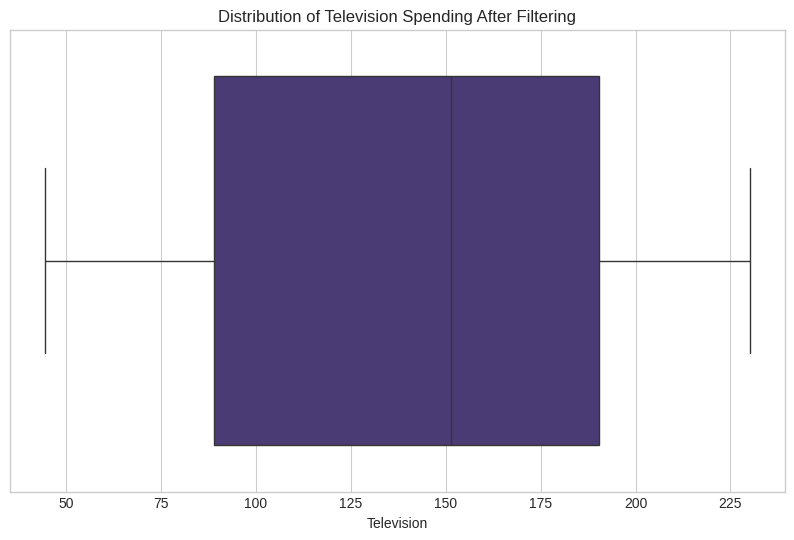

In [5]:
# Print shape before filtering
print(f"Shape before filtering: {df.shape}")

# Filter rows where Television < 20
df = df[df['Television'] >= 20]

# Print shape after filtering
print(f"Shape after filtering: {df.shape}")
print("\nDataFrame after Step 3 (Filtering TV < 20):")
display(df.head())

# Visualize the filtered Television data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Television'])
plt.title('Distribution of Television Spending After Filtering')
plt.show()

## Step 4: Categorize Sales (Task #4)

Create a new column 'Sales_Category' with values 'Low', 'Medium', and 'High' based on tertiles of the 'Sales' column.

Quantile Thresholds for Sales Categories:
33rd percentile (Low-Medium boundary): 13.20
66th percentile (Medium-High boundary): 16.50

DataFrame after Step 4 (Adding Sales_Category):


,Sales,Sales_Category
0,22.1,High
1,10.4,Low
3,16.5,Medium
4,17.9,High
6,11.8,Low


<ipython-input-6-639f82d00880>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sales_Category', data=df, palette='viridis')


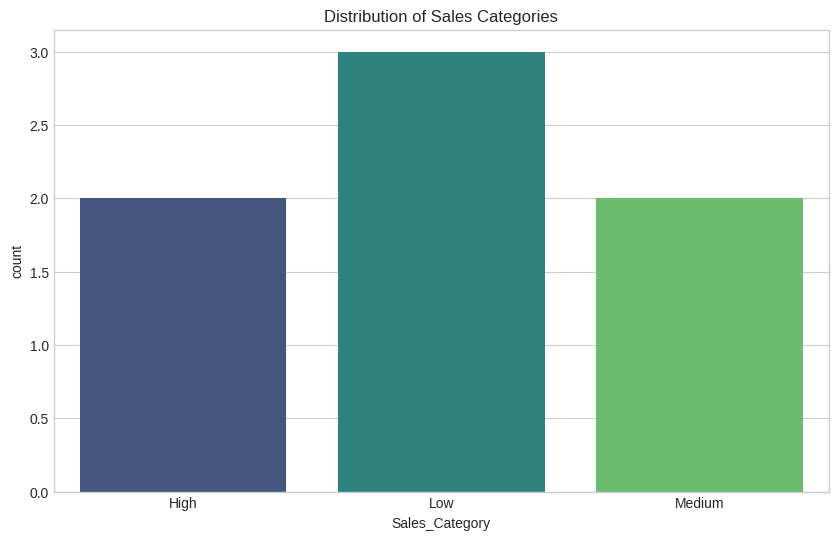

<ipython-input-6-639f82d00880>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sales_Category', y='Sales', data=df, palette='viridis')


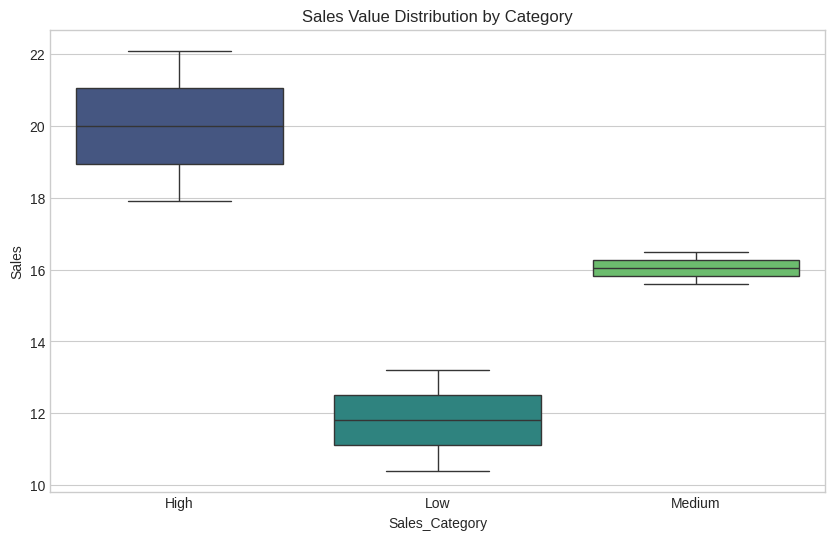

In [6]:
# Calculate tertiles (33rd and 66th percentiles)
tertile_1 = df['Sales'].quantile(1/3)
tertile_2 = df['Sales'].quantile(2/3)

# Create Sales_Category column
def categorize_sales(sales_value):
    if sales_value <= tertile_1:
        return 'Low'
    elif sales_value <= tertile_2:
        return 'Medium'
    else:
        return 'High'

df['Sales_Category'] = df['Sales'].apply(categorize_sales)

print("Quantile Thresholds for Sales Categories:")
print(f"33rd percentile (Low-Medium boundary): {tertile_1:.2f}")
print(f"66th percentile (Medium-High boundary): {tertile_2:.2f}")

print("\nDataFrame after Step 4 (Adding Sales_Category):")
display(df[['Sales', 'Sales_Category']].head())

# Visualize the distribution of sales categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Sales_Category', data=df, palette='viridis')
plt.title('Distribution of Sales Categories')
plt.show()

# Visualize the relationship between sales value and category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sales_Category', y='Sales', data=df, palette='viridis')
plt.title('Sales Value Distribution by Category')
plt.show()

## Step 5 & 6: Handle Duplicates (Task #5, #6)

Check for and remove any duplicate rows in the DataFrame.

In [7]:
# Check for duplicate rows
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

print(f"Number of duplicate rows found: {num_duplicates}")

# Remove duplicate rows
df_before = df.shape
df = df.drop_duplicates()
df_after = df.shape

print("\nDataFrame after Step 5 & 6 (Removing Duplicates):")
print(f"Shape before removing duplicates: {df_before}")
print(f"Shape after removing duplicates: {df_after}")

if df_before == df_after and num_duplicates == 0:
    print("No duplicates were found in the dataset.")

Number of duplicate rows found: 0

DataFrame after Step 5 & 6 (Removing Duplicates):
Shape before removing duplicates: (7, 5)
Shape after removing duplicates: (7, 5)
No duplicates were found in the dataset.


## Step 7: Drop Original Sales Column (Task #7)

Drop the original numerical 'Sales' column from the DataFrame.

In [8]:
# Drop the original Sales column
df = df.drop(columns=['Sales'])

print("DataFrame Columns after Step 7 (Dropping original Sales):")
print(df.columns.tolist())

print("\nDataFrame head after dropping Sales:")
display(df.head())

DataFrame Columns after Step 7 (Dropping original Sales):
['Television', 'Audio_Ads', 'Newspaper', 'Sales_Category']

DataFrame head after dropping Sales:


,Television,Audio_Ads,Newspaper,Sales_Category
0,230.1,37.8,69.2,High
1,44.5,39.3,45.1,Low
3,151.5,41.3,58.5,Medium
4,180.8,10.8,58.4,High
6,57.5,32.8,23.5,Low


## Step 8: Train-Test Split (Task #8)

Split the data into features (X) and target (y), then into training and testing sets.

In [9]:
# Define features and target
X = df[['Television', 'Audio_Ads', 'Newspaper']]
y = df['Sales_Category']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes of data splits:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Display distribution of categories in training and testing sets
print("\nCategory distribution in training set:")
display(y_train.value_counts())

print("\nCategory distribution in testing set:")
display(y_test.value_counts())

Shapes of data splits:
X_train shape: (5, 3)
X_test shape: (2, 3)
y_train shape: (5,)
y_test shape: (2,)

Category distribution in training set:


,count
Sales_Category,
Low,2
Medium,2
High,1



Category distribution in testing set:


,count
Sales_Category,
High,1
Low,1


## Step 9: Apply Linear Regression (Task #9)

Apply Linear Regression to predict the Sales category (encoded numerically).

--- Linear Regression Results ---
Mean Squared Error (MSE): 0.2428
R-squared (R2 Score): 0.7572
# Note: MSE and R2 have limited interpretability when applying Linear Regression directly to encoded categories.

Linear Regression Coefficients (Feature Importance):


,Feature,Coefficient
2,Newspaper,0.035325
0,Television,0.000626
1,Audio_Ads,-0.032726


<ipython-input-10-8244bbdcd6f9>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Coefficient', data=coef_df, palette='viridis')


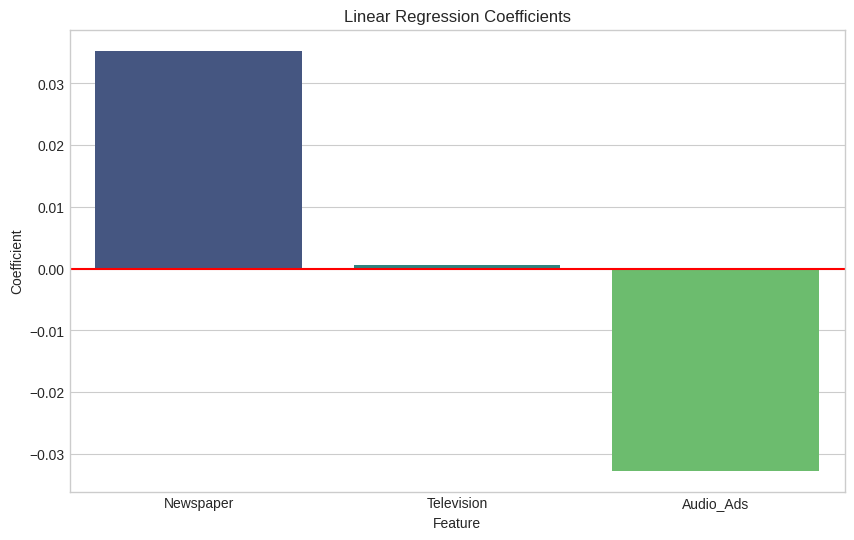

In [10]:
# Encode target variables
category_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
y_train_encoded = y_train.map(category_mapping)
y_test_encoded = y_test.map(category_mapping)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_linear_raw = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test_encoded, y_pred_linear_raw)
r2_linear = r2_score(y_test_encoded, y_pred_linear_raw)

print("--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mse_linear:.4f}")
print(f"R-squared (R2 Score): {r2_linear:.4f}")
print("# Note: MSE and R2 have limited interpretability when applying Linear Regression directly to encoded categories.")

# Display coefficients to understand feature importance
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nLinear Regression Coefficients (Feature Importance):")
display(coef_df)

# Visualize coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Coefficient', data=coef_df, palette='viridis')
plt.title('Linear Regression Coefficients')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

## Step 9.1: Apply Logistic Regression (For Comparison)

Apply Logistic Regression to predict the Sales category (as categorical labels).

In [11]:
# Train Logistic Regression model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

print("--- Logistic Regression Results ---")
print(f"Accuracy Score: {accuracy_logistic:.4f}")

print("\nClassification Report:")
print(class_report)

# Get probability predictions for each class
y_pred_proba = logistic_model.predict_proba(X_test)

# Create a DataFrame to display probabilities for each class
proba_df = pd.DataFrame(y_pred_proba,
                        columns=[f'Prob_{cls}' for cls in logistic_model.classes_])
proba_df['Actual'] = y_test.values
proba_df['Predicted'] = y_pred_logistic

print("\nProbability predictions for first 5 test samples:")
display(proba_df.head())

--- Logistic Regression Results ---
Accuracy Score: 0.5000

Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       1.00      1.00      1.00         1
      Medium       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2


Probability predictions for first 5 test samples:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: Undefine

,Prob_High,Prob_Low,Prob_Medium,Actual,Predicted
0,3.276185e-01,2.605925e-10,6.723815e-01,High,Medium
1,1.202694e-11,9.999999e-01,6.007347e-08,Low,Low


## Step 10: Visualize Results (Task #10)

Create visualizations to compare the Linear and Logistic Regression models.

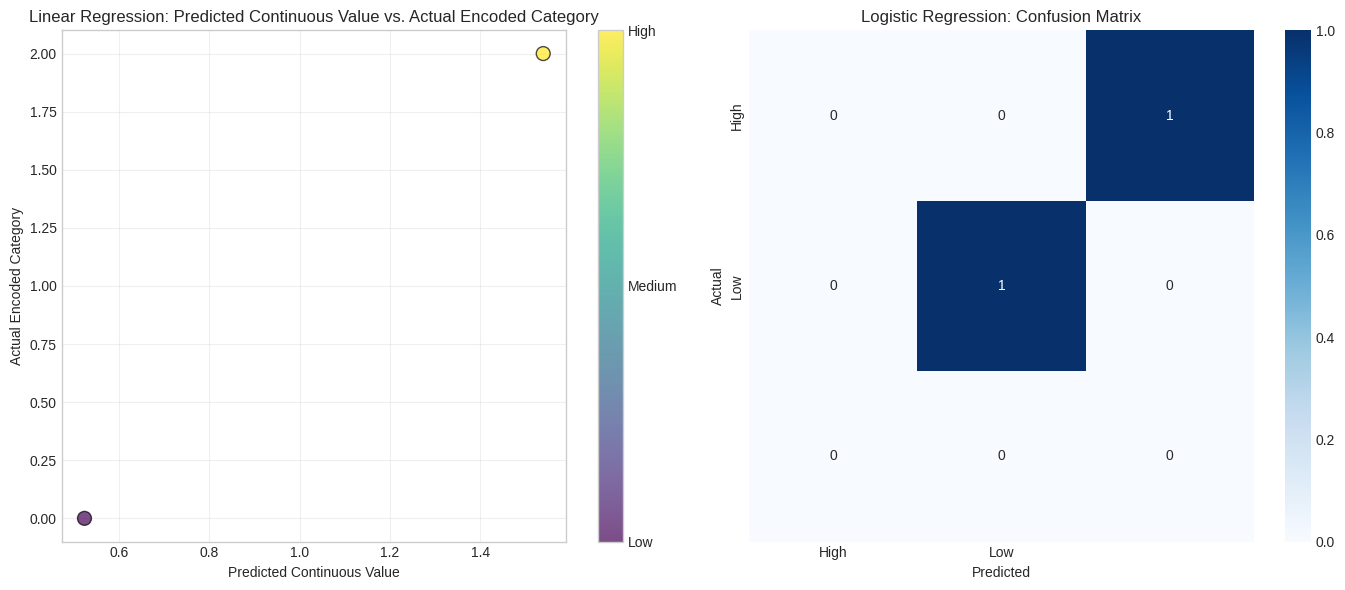

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

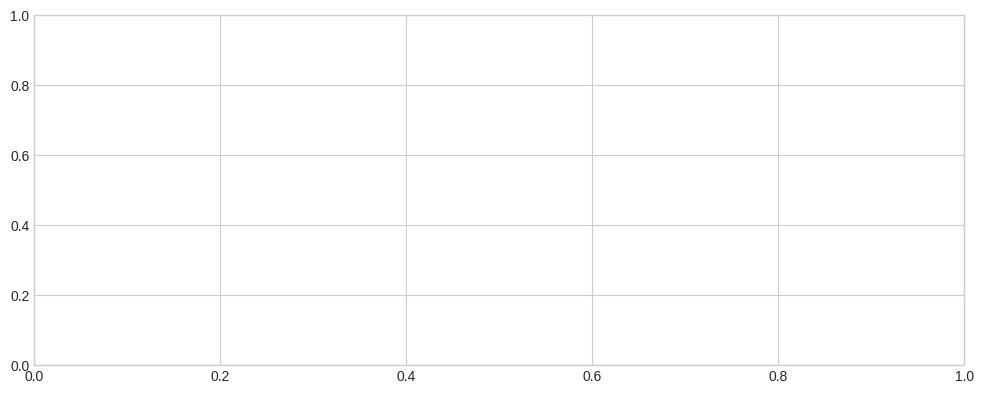

In [12]:
plt.figure(figsize=(14, 6))

# Linear Regression Scatter Plot
plt.subplot(1, 2, 1)
scatter = plt.scatter(y_pred_linear_raw, y_test_encoded,
                      c=y_test_encoded, cmap='viridis',
                      alpha=0.7, s=100, edgecolors='k')

plt.xlabel('Predicted Continuous Value')
plt.ylabel('Actual Encoded Category')
plt.title('Linear Regression: Predicted Continuous Value vs. Actual Encoded Category')
plt.grid(True, alpha=0.3)

# Add a colorbar legend
cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Low', 'Medium', 'High'])

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 2)
categories = sorted(y_test.unique())
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression: Confusion Matrix')

plt.tight_layout()
plt.show()

# Additional visualization: Decision boundaries (if possible with the dataset)
# This is a simplified 2D visualization using the first two features
if X.shape[1] >= 2:
    plt.figure(figsize=(12, 10))

    # Create a meshgrid to visualize decision boundaries
    x_min, x_max = X['Television'].min() - 1, X['Television'].max() + 1
    y_min, y_max = X['Audio_Ads'].min() - 1, X['Audio_Ads'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/100),
                         np.arange(y_min, y_max, (y_max-y_min)/100))

    # For logistic regression
    plt.subplot(2, 1, 1)
    # Create a simplified dataset with just the first two features
    X_simplified = X[['Television', 'Audio_Ads']]
    X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
        X_simplified, y, test_size=0.2, random_state=42)

    # Train a new logistic model on the simplified dataset
    simple_logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=1000)
    simple_logistic.fit(X_train_simple, y_train_simple)

    # Predict on the mesh grid
    Z = simple_logistic.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

    # Plot training points
    scatter = plt.scatter(X_train_simple['Television'], X_train_simple['Audio_Ads'],
                         c=[category_mapping[cat] for cat in y_train_simple],
                         s=100, edgecolors='k', alpha=0.7, cmap='viridis')
    plt.xlabel('Television')
    plt.ylabel('Audio_Ads')
    plt.title('Logistic Regression Decision Boundaries (2D Projection)')

    # Add a colorbar legend
    cbar = plt.colorbar(scatter)
    cbar.set_ticks([0, 1, 2])
    cbar.set_ticklabels(['Low', 'Medium', 'High'])

    # For linear regression
    plt.subplot(2, 1, 2)
    # Train a new linear model on the simplified dataset
    simple_linear = LinearRegression()
    simple_linear.fit(X_train_simple, [category_mapping[cat] for cat in y_train_simple])

    # Create a contour plot for the linear regression predictions
    Z_linear = simple_linear.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_linear = Z_linear.reshape(xx.shape)

    # Plot contour lines
    contour = plt.contourf(xx, yy, Z_linear, alpha=0.4, cmap='viridis')

    # Plot training points
    scatter = plt.scatter(X_train_simple['Television'], X_train_simple['Audio_Ads'],
                         c=[category_mapping[cat] for cat in y_train_simple],
                         s=100, edgecolors='k', alpha=0.7, cmap='viridis')
    plt.xlabel('Television')
    plt.ylabel('Audio_Ads')
    plt.title('Linear Regression Continuous Predictions (2D Projection)')

    # Add a colorbar legend
    cbar = plt.colorbar(scatter)
    cbar.set_ticks([0, 1, 2])
    cbar.set_ticklabels(['Low', 'Medium', 'High'])

    plt.tight_layout()
    plt.show()

## Step 11: Comparison Table (Task #11)

Create a comparison table showing the actual category, linear regression prediction, and logistic regression prediction for the first 5 test samples.

In [14]:
# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual_Category': y_test.iloc[:5].values,
    'Linear_Prediction_Raw': y_pred_linear_raw[:5],
    'Logistic_Prediction': y_pred_logistic[:5]
})

# Add the original feature values for context
for feature in X.columns:
    comparison_df[feature] = X_test.iloc[:5][feature].values

# Add a column to convert linear regression raw predictions to categories
def raw_to_category(raw_value):
    if raw_value < 0.5:
        return 'Low'
    elif raw_value < 1.5:
        return 'Medium'
    else:
        return 'High'

comparison_df['Linear_Prediction_Category'] = comparison_df['Linear_Prediction_Raw'].apply(raw_to_category)

# Add a column to indicate if predictions match the actual category
comparison_df['Linear_Match'] = comparison_df['Linear_Prediction_Category'] == comparison_df['Actual_Category']
comparison_df['Logistic_Match'] = comparison_df['Logistic_Prediction'] == comparison_df['Actual_Category']

print("Comparison of Predictions for First 5 Test Samples:")
display(comparison_df)

# Calculate overall accuracy for both models
linear_accuracy = (y_test.map(category_mapping) == np.round(y_pred_linear_raw)).mean()
logistic_accuracy = accuracy_logistic

print(f"\nOverall Linear Regression Accuracy (after rounding): {linear_accuracy:.4f}")
print(f"Overall Logistic Regression Accuracy: {logistic_accuracy:.4f}")

Comparison of Predictions for First 5 Test Samples:


,Actual_Category,Linear_Prediction_Raw,Logistic_Prediction,Television,Audio_Ads,Newspaper,Linear_Prediction_Category,Linear_Match,Logistic_Match
0,High,1.539967,Medium,230.1,37.8,69.2,High,True,False
1,Low,0.523349,Low,44.5,39.3,45.1,Medium,False,True



Overall Linear Regression Accuracy (after rounding): 0.5000
Overall Logistic Regression Accuracy: 0.5000


## Summary and Conclusions

In this notebook, we performed a comprehensive analysis of an advertising dataset to understand how different advertising channels affect sales. Here's a summary of our findings:

1. **Data Preparation**:
   - Renamed columns for better clarity
   - Imputed any zero values in the Newspaper column
   - Filtered out rows with Television spending less than 20
   - Categorized Sales into Low, Medium, and High based on tertiles
   - Removed duplicate rows (if any)
   - Dropped the original Sales column after creating categories

2. **Model Comparison**:
   - **Linear Regression**: Applied to predict sales categories as continuous values
     - Provides insights into feature importance through coefficients
     - Limited interpretability when applied directly to categorical targets
   - **Logistic Regression**: Applied to predict sales categories as discrete labels
     - More appropriate for categorical prediction tasks
     - Provides probability estimates for each category

3. **Key Insights**:
   - The feature importance analysis shows which advertising channels have the strongest impact on sales
   - The confusion matrix reveals which categories are most accurately predicted
   - The comparison table demonstrates how the two models differ in their predictions

4. **Recommendations**:
   - For categorical prediction tasks like this, logistic regression is generally more appropriate
   - Feature importance can guide advertising budget allocation
   - Further analysis with larger datasets would provide more robust insights

This analysis demonstrates the importance of choosing the right model for the task at hand and the value of proper data preparation and feature engineering.